<a href="https://colab.research.google.com/github/dionysus-laughed/school_cs4410/blob/main/summers_cs4410_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
diabetes = load_diabetes(as_frame=True)

X = diabetes.data
y = diabetes.target

df = X.copy()
df['target'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
df.describe()
df.isna().sum()
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

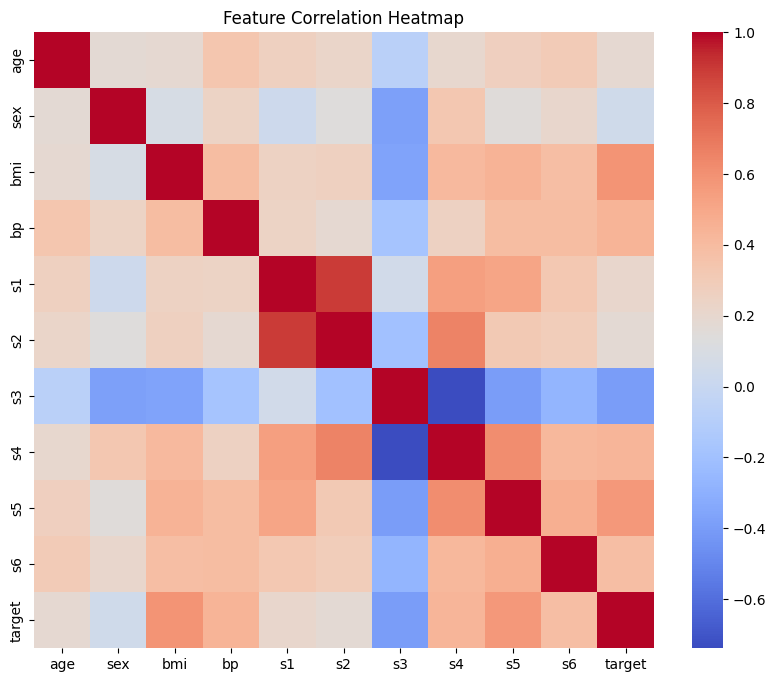

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

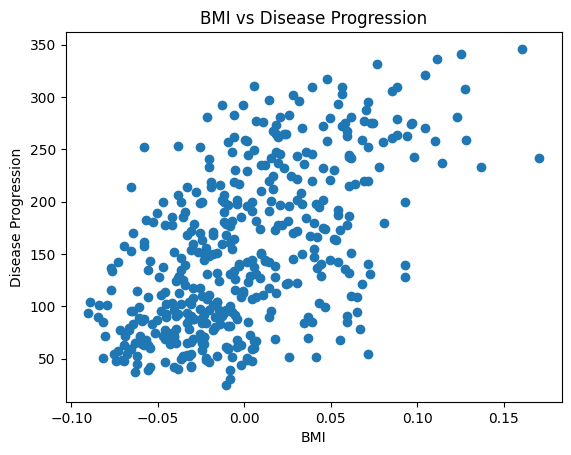

In [9]:
plt.scatter(df['bmi'], df['target'])
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("BMI vs Disease Progression")
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results")
print("MSE:", mse)
print("R^2:", r2)

Linear Regression Results
MSE: 2848.3106508475057
R^2: 0.4849058889476755


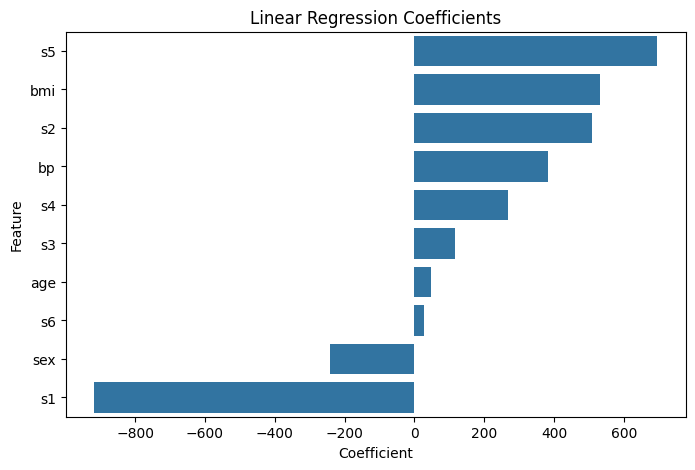

In [13]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin_reg.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df

plt.figure(figsize=(8, 5))
sns.barplot(data=coef_df, x="Coefficient", y="Feature")
plt.title("Linear Regression Coefficients")
plt.show()


In [14]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

In [15]:
models = {
    "Linear": y_pred,
    "Ridge": ridge_pred,
    "Lasso": lasso_pred
}

for name, preds in models.items():
    print(name)
    print("MSE:", mean_squared_error(y_test, preds))
    print("R^2:", r2_score(y_test, preds))
    print("-" * 30)


Linear
MSE: 2848.3106508475057
R^2: 0.4849058889476755
------------------------------
Ridge
MSE: 3105.4721464484724
R^2: 0.43840029731424457
------------------------------
Lasso
MSE: 2753.921832937356
R^2: 0.5019753487835406
------------------------------


In [16]:
"""
Conclusion:
Linear regression provides baseline for prediction.
Ridge regression slightly improves generalization.
Lasso regression improves feature selection by coeff shrinking.
"""


'\nConclusion:\nLinear regression provides baseline for prediction.\nRidge regression slightly improves generalization.\nLasso regression improves feature selection by coeff shrinking.\n'